# Разведочный анализ данных (Explanatory Data Analysis, EDA) в Python

#### Зачем нужен разведочный анализ как первый этап решения задачи машинного обучения:
- Понимание структуры, распределений и особенностей данных
- Выявление аномалий, ошибок и пропусков
- Выявление взаимосвязей между признаками
- Выбор признаков
- Понимание необходимости порождения новых признаков на основе существующих (feature engeneering)



#### Полезные ссылки:
- <a href="https://pandas.pydata.org/">Документация Pandas</a>
- <a href="https://matplotlib.org/">Документация Matplotlib</a>
- <a href="https://seaborn.pydata.org/">Документация Seaborn</a>

#### Дополнительные материалы:

- Маккинни У. Python и анализ данных / Пер. с англ. Слинкин А.А. – М: ДМК Пресс, 2015. – 482 с. ([Google Books]
- Брюс П., Брюс Э. Практическая статистика для специалистов Data Science. – БХВ-Петербург, 2018. — 304 с. ([Google Books](https://books.google.ru/books?hl=ru&lr=&id=l_6MDwAAQBAJ&oi=fnd&pg=PA5&dq=%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F+%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0+%D0%B4%D0%BB%D1%8F+%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%BE%D0%B2+data+science&ots=fB2sdc0NnS&sig=S7_kC8Nv2Ipg5By2UbTDVDGVvqE&redir_esc=y#v=onepage&q=%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B4%D0%BB%D1%8F%20%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%81%D1%82%D0%BE%D0%B2%20data%20science&f=false))
- [Лекции с YouTube](https://www.youtube.com/watch?v=Yhrp-YVZH84)
- [Еще лекции с YouTube](https://youtu.be/uJpDzHGUamg?si=29xzZdo2AzE12nOH)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

#### Загружаем данные

In [2]:
data_path = 'EDA_demo_data/wr282025.txt'
fields_path = 'EDA_demo_data/fld282025a0.txt'

df_fields = pd.read_fwf (fields_path, encoding = "cp1251", header = None)
df_fields

,0,1,2,3
0,1,1,5,Синоптический индекс станции
1,2,2,4,Год по Гринвичу
2,3,3,2,Месяц по Гринвичу
3,4,4,2,День по Гринвичу
4,5,5,2,Срок по Гринвичу
5,6,6,2,Общее количество облачности
6,7,7,2,Количество облачности нижнего яруса
7,8,8,3,Направление ветра
8,9,9,2,Средняя скорость ветра
9,10,10,2,Максимальная скорость ветра


In [3]:
df_fields[3] = [re.sub(r'\s+', ' ', field) for field in df_fields[3]]

df = pd.read_csv (data_path, sep=';', header=None, names=df_fields[3])

df.head()



,Синоптический индекс станции,Год по Гринвичу,Месяц по Гринвичу,День по Гринвичу,Срок по Гринвичу,Общее количество облачности,Количество облачности нижнего яруса,Направление ветра,Средняя скорость ветра,Максимальная скорость ветра,Сумма осадков,Температура поверхности почвы,Температура воздуха по сухому терм-ру,Относительная влажность воздуха,Температура точки росы,Атмосферное давление на уровне станции,Атмосферное давление на уровне моря
0,20744,1966,12,31,18,,,,,,,,,,,,
1,20744,1966,12,31,21,10,10,180,12,,,,-7.3,97,-8.0,1012.7,1014.8
2,20744,1967,1,1,0,,,,,,,,,,,,
3,20744,1967,1,1,3,10,10,180,9,,0.0,,-7.6,90,-9.0,1010.2,1012.3
4,20744,1967,1,1,6,,,,,,,,,,,,


#### Подготовка данных 

In [4]:

df['Date'] = [pd.Timestamp(year,month,day,hour) for year,month,day,hour in zip(df['Год по Гринвичу'], df['Месяц по Гринвичу'], df['День по Гринвичу'], df['Срок по Гринвичу'])]
df = df.drop (columns=[x for x in df.columns if 'по Гринвичу' in x or 'Синоптический индекс' in x])

df = df.set_index ('Date')
df.columns = ['tcc', 'lcc', 'wdir', 'wvel', 'wgust', 'prec', 'tg', 'ta', 'rh', 'td', 'ps', 'psl']
display(df.head())


,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
1966-12-31 18:00:00,,,,,,,,,,,,
1966-12-31 21:00:00,10,10,180,12,,,,-7.3,97,-8.0,1012.7,1014.8
1967-01-01 00:00:00,,,,,,,,,,,,
1967-01-01 03:00:00,10,10,180,9,,0.0,,-7.6,90,-9.0,1010.2,1012.3
1967-01-01 06:00:00,,,,,,,,,,,,


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163632 entries, 1966-12-31 18:00:00 to 2022-12-31 15:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tcc     163632 non-null  object
 1   lcc     163632 non-null  object
 2   wdir    163632 non-null  object
 3   wvel    163632 non-null  object
 4   wgust   163632 non-null  object
 5   prec    163632 non-null  object
 6   tg      163632 non-null  object
 7   ta      163632 non-null  object
 8   rh      163632 non-null  object
 9   td      163632 non-null  object
 10  ps      163632 non-null  object
 11  psl     163632 non-null  object
dtypes: object(12)
memory usage: 16.2+ MB


None

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df.to_csv('EDA_demo_data/karmakuly.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163632 entries, 1966-12-31 18:00:00 to 2022-12-31 15:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tcc     144599 non-null  float64
 1   lcc     144600 non-null  float64
 2   wdir    144616 non-null  float64
 3   wvel    144602 non-null  float64
 4   wgust   128363 non-null  float64
 5   prec    136801 non-null  float64
 6   tg      0 non-null       float64
 7   ta      144562 non-null  float64
 8   rh      144623 non-null  float64
 9   td      144591 non-null  float64
 10  ps      144588 non-null  float64
 11  psl     144421 non-null  float64
dtypes: float64(12)
memory usage: 16.2 MB


None

#### Варианты доступа к столбцам и колонкам

In [8]:
# Доступ по индексу
df['2010-01-01 03':'2010-01-01 03']


,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
2010-01-01 03:00:00,4.0,0.0,130.0,4.0,18.0,0.0,NaN,-14.6,63.0,-19.7,1039.3,1041.2


In [9]:
# Доступ по порядковому номеру
df[445:448]

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
1967-02-25 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967-02-25 12:00:00,8.0,0.0,180.0,14.0,NaN,0.0,NaN,-11.0,81.0,-14.0,1008.4,1010.5
1967-02-25 15:00:00,12.0,12.0,230.0,8.0,NaN,0.0,NaN,-8.4,96.0,-9.0,1009.0,1011.1


In [10]:
# Доступ по массиву булевских значений
df[df['wgust'] > 30]

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
1976-12-01 06:00:00,3.0,0.0,110.0,27.0,31.0,0.0,NaN,-23.3,85.0,-25.1,1002.3,1004.4
1977-01-26 09:00:00,10.0,0.0,90.0,27.0,32.0,0.0,NaN,-23.5,87.0,-25.3,1025.4,1027.6
1977-01-26 12:00:00,10.0,0.0,90.0,24.0,31.0,0.0,NaN,-23.3,86.0,-25.1,1026.5,1028.7
1977-01-26 15:00:00,10.0,0.0,90.0,26.0,32.0,0.0,NaN,-24.6,88.0,-25.7,1026.8,1029.0
1977-01-29 06:00:00,10.0,0.0,90.0,34.0,37.0,0.0,NaN,-26.0,85.0,-27.7,1024.1,1026.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11 03:00:00,10.0,6.0,110.0,26.0,32.0,0.9,NaN,-5.0,88.0,-6.7,1004.5,1006.5
2022-04-11 06:00:00,10.0,4.0,110.0,27.0,38.0,0.0,NaN,-5.8,87.0,-7.6,1004.3,1006.3
2022-04-26 15:00:00,10.0,7.0,110.0,25.0,32.0,0.0,NaN,-9.4,88.0,-11.0,996.1,998.2


In [11]:
# Доступ к колонкам по имени
df[['wdir', 'wvel']].head()

,wdir,wvel
Date,,
1966-12-31 18:00:00,NaN,NaN
1966-12-31 21:00:00,180.0,12.0
1967-01-01 00:00:00,NaN,NaN
1967-01-01 03:00:00,180.0,9.0
1967-01-01 06:00:00,NaN,NaN


In [12]:
# Одновременная обрезка по колонкам и столбцам

#df.loc['2010-01-01 03']
#df.loc['2010-01-01 03':'2010-01-01 12', ['wdir', 'wvel']]
df.iloc[3333, 4:7]

wgust   NaN
prec    NaN
tg      NaN
Name: 1968-02-21 09:00:00, dtype: float64

#### Идентификация пропусков с помощью seaborn

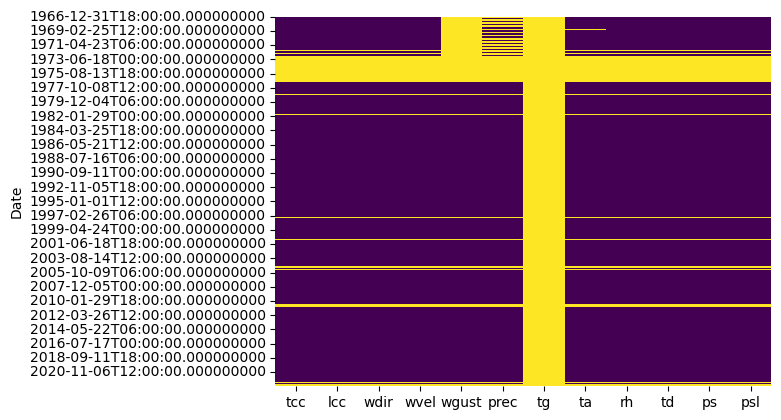

In [13]:
import matplotlib.dates as mdates
g = sns.heatmap (df.isnull(), cbar = False, cmap = 'viridis')  #
#g.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#sys.exit()

# Одномерный разведочный анализ данных (univariate analysis)

In [14]:
# Подсчет статистических метрик


#df['wvel'].median()
#df.describe()
df.describe().T #Транспонирование

,count,mean,std,min,25%,50%,75%,max
tcc,144599.0,7.794763,3.699801,0.0,6.0,10.0,10.0,13.0
lcc,144600.0,5.147607,4.623218,0.0,0.0,5.0,10.0,13.0
wdir,144616.0,162.908129,101.602842,0.0,100.0,140.0,230.0,999.0
wvel,144602.0,7.723040,5.849101,0.0,4.0,7.0,10.0,48.0
wgust,128363.0,11.818756,7.041868,0.0,7.0,10.0,15.0,59.0
prec,136801.0,0.128353,0.693385,0.0,0.0,0.0,0.0,32.5
tg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ta,144562.0,-4.309164,9.618209,-35.9,-11.1,-2.7,2.9,27.5
rh,144623.0,80.472608,11.740357,1.0,73.0,81.0,90.0,100.0
td,144591.0,-7.250644,10.138654,-42.6,-14.6,-5.3,0.7,18.1


In [15]:
# Уникальные значения
np.sort (df['tcc'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., nan])

In [16]:

def nunique (x):
    return len (pd.unique(x))

display(df.apply (pd.unique))
display(df.apply (nunique))

tcc      [nan, 10.0, 8.0, 3.0, 2.0, 9.0, 0.0, 1.0, 6.0,...
lcc      [nan, 10.0, 0.0, 3.0, 2.0, 1.0, 6.0, 12.0, 9.0...
wdir     [nan, 180.0, 230.0, 360.0, 140.0, 110.0, 200.0...
wvel     [nan, 12.0, 9.0, 8.0, 10.0, 4.0, 7.0, 14.0, 16...
wgust    [nan, 30.0, 28.0, 31.0, 29.0, 27.0, 26.0, 24.0...
prec     [nan, 0.0, 0.2, 0.5, 2.1, 0.6, 0.4, 1.0, 1.8, ...
tg                                                   [nan]
ta       [nan, -7.3, -7.6, -1.6, -1.3, -4.4, -5.8, -8.9...
rh       [nan, 97.0, 90.0, 93.0, 92.0, 94.0, 96.0, 78.0...
td       [nan, -8.0, -9.0, -4.0, -2.0, -3.0, -5.0, -13....
ps       [nan, 1012.7, 1010.2, 1005.3, 1004.0, 1006.3, ...
psl      [nan, 1014.8, 1012.3, 1007.3, 1006.0, 1008.3, ...
dtype: object

tcc       15
lcc       15
wdir     105
wvel      47
wgust     53
prec     166
tg         1
ta       598
rh        85
td       563
ps       950
psl      956
dtype: int64

tcc
10.0    9074
9.0     2959
8.0     1737
6.0     1329
12.0    1301
7.0     1197
4.0     1186
3.0      850
2.0      740
1.0      424
0.0      424
13.0     269
5.0      172
Name: count, dtype: int64

<Axes: ylabel='count'>

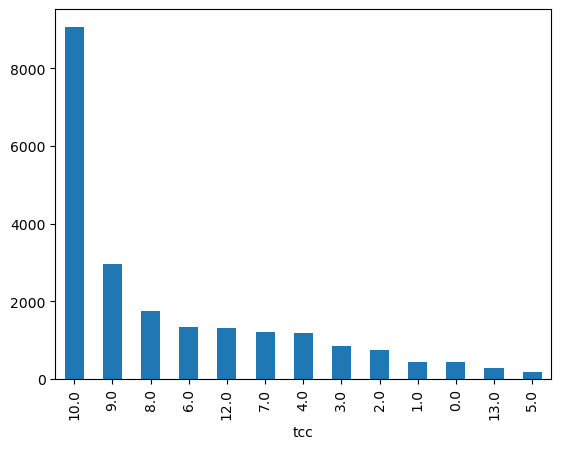

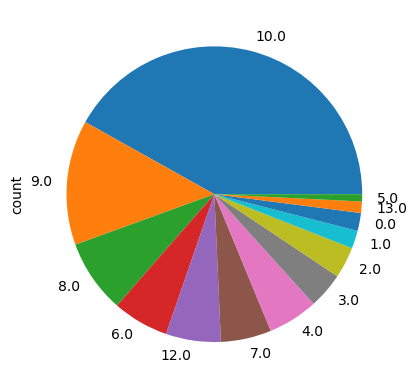

In [17]:
# Подсчет различых значений

df_cr = df['2015':]

display(df_cr['tcc'].value_counts())
plt.figure()
df_cr['tcc'].value_counts().plot.bar() #
plt.figure()
df_cr['tcc'].value_counts().plot.pie() #

In [18]:
df[df['wdir'] == 999]

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
1978-03-23 06:00:00,10.0,0.0,999.0,3.0,24.0,0.0,NaN,-13.9,67.0,-19.1,1022.8,1024.9
1978-03-23 09:00:00,8.0,0.0,999.0,7.0,14.0,0.0,NaN,-13.6,76.0,-17.1,1022.8,1024.9
1980-06-21 03:00:00,10.0,6.0,999.0,3.0,7.0,0.0,NaN,3.8,78.0,0.4,1004.1,1006.1
1980-07-08 09:00:00,12.0,6.0,999.0,1.0,4.0,0.0,NaN,4.7,70.0,-0.4,1009.9,1011.9
1984-02-29 15:00:00,6.0,6.0,999.0,1.0,5.0,0.2,NaN,-12.5,81.0,-15.2,994.0,995.9
1984-04-10 18:00:00,9.0,0.0,999.0,2.0,5.0,0.0,NaN,-18.1,67.0,-23.1,1010.0,1012.1
1984-04-25 21:00:00,4.0,0.0,999.0,2.0,18.0,0.0,NaN,-14.7,63.0,-19.8,1016.1,1018.1
1984-05-20 21:00:00,0.0,0.0,999.0,2.0,7.0,0.0,NaN,-4.6,74.0,-8.5,1019.4,1021.3
1984-06-16 06:00:00,9.0,8.0,999.0,10.0,20.0,0.0,NaN,5.8,70.0,0.7,1010.2,1012.0


c:\Anaconda\envs\ML\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


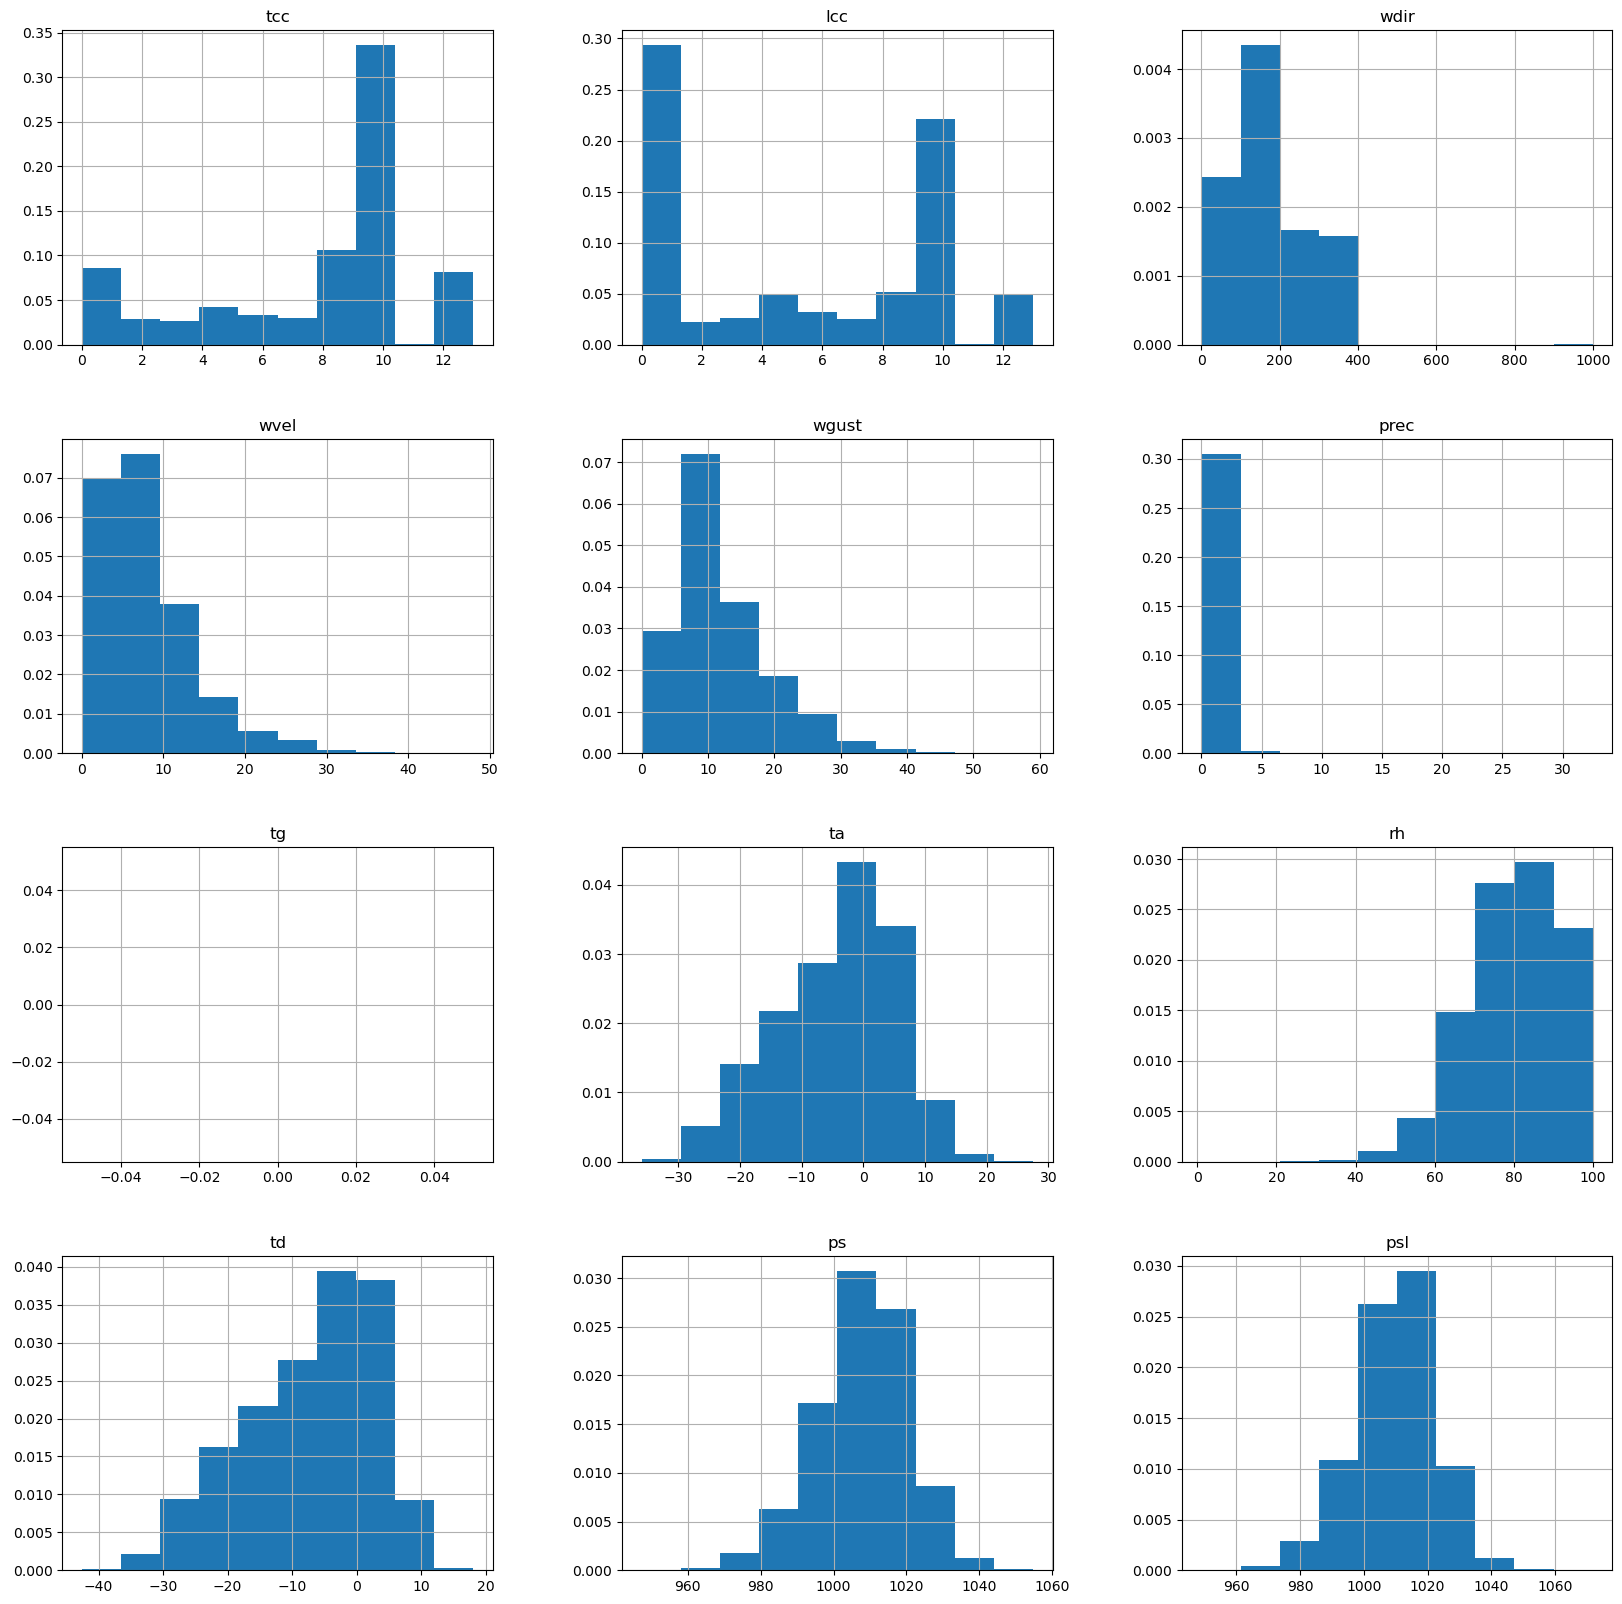

In [19]:
#Гистограммы распределения

df.hist(figsize=(20,20), density=True);

(0.0, 40.0)

<Figure size 640x480 with 0 Axes>

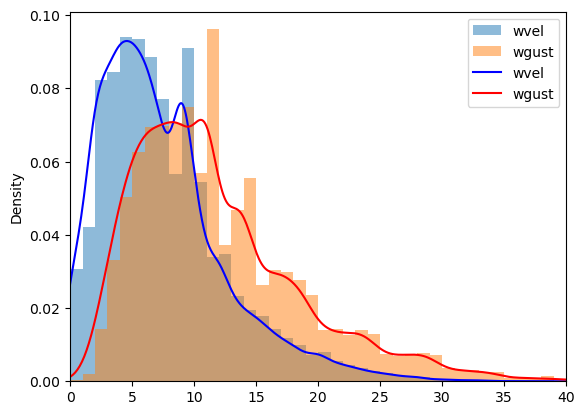

In [20]:
#Гистограммы и графики ядерной плотности 

plt.figure()
df_cr[['wvel', 'wgust']].plot.hist(alpha=0.5, density = True, bins=range (0, 40))
df_cr[['wvel', 'wgust']].plot.density(ax = plt.gca(), color = ['blue', 'red']) 
plt.xlim(0, 40)


(0.0, 40.0)

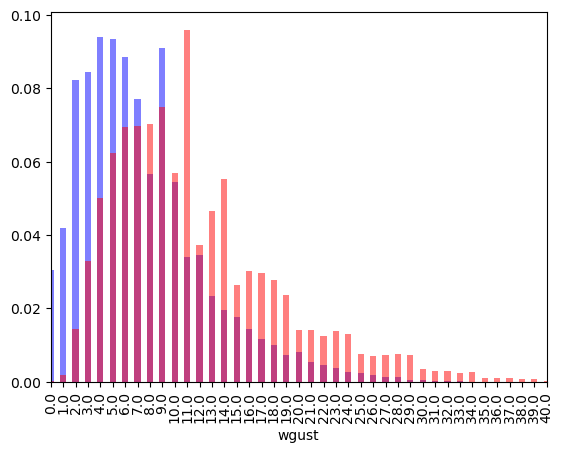

In [21]:
plt.figure()
df_cr['wvel'].value_counts(normalize = True).sort_index().plot.bar(color = 'blue', alpha = 0.5, label = 'wvel')
df_cr['wgust'].value_counts(normalize = True).sort_index().plot.bar(color= 'red', alpha = 0.5, label = 'wgust')
plt.xlim(0, 40)

<Axes: xlabel='year'>

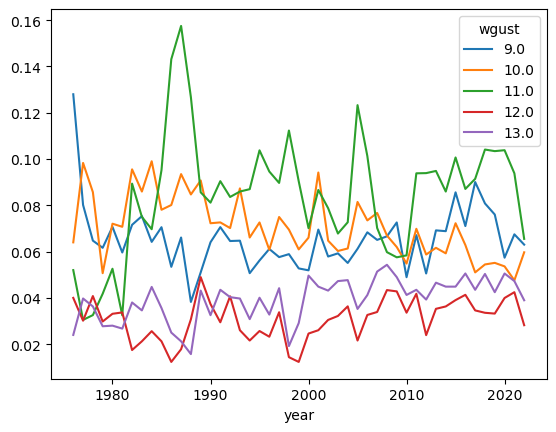

In [22]:
counts = df.groupby (df.index.year)['wgust'].value_counts(normalize = True)

years = counts.index.get_level_values(0).unique()
vals  = counts.index.get_level_values(1).unique() 

counts = pd.concat([pd.DataFrame (counts[year]).T.reindex(sorted(vals), axis=1) for year in years]).fillna(0)
counts['year'] = years
counts = counts.set_index ('year')
counts.loc[:, 9:13].plot()



In [23]:
df['2006-03-23 12':'2006-03-23 21']

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
2006-03-23 12:00:00,7.0,0.0,90.0,34.0,38.0,0.0,NaN,-10.5,86.0,-12.5,997.0,998.8
2006-03-23 15:00:00,10.0,0.0,90.0,44.0,49.0,0.0,NaN,-11.4,89.0,-12.7,996.7,998.5
2006-03-23 18:00:00,5.0,0.0,90.0,NaN,59.0,0.0,NaN,-12.5,90.0,-13.8,997.2,999.0
2006-03-23 21:00:00,8.0,0.0,90.0,NaN,NaN,0.0,NaN,-14.2,90.0,-15.5,997.9,999.7


<Axes: >

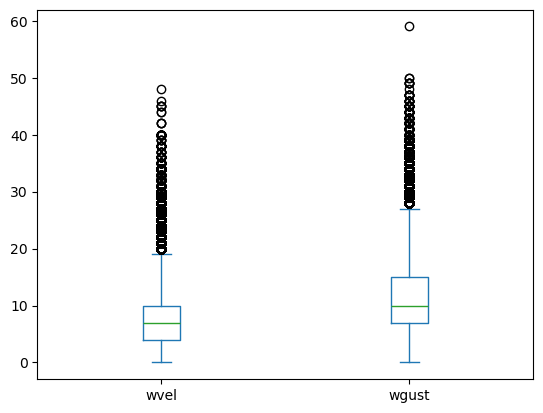

In [24]:
# Ящики с усами
#df.plot.box()
df[['wvel', 'wgust']].plot.box()

### Двумерный анализ данных (bivariate data analysis)

#### Корреляция

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
tcc,1.000000,0.658600,0.243477,0.096495,0.088469,0.100411,NaN,0.367461,0.457408,0.428866,-0.196095,-0.198706
lcc,0.658600,1.000000,0.338019,-0.065636,-0.071300,0.116017,NaN,0.364152,0.529717,0.439738,-0.116860,-0.119169
wdir,0.243477,0.338019,1.000000,-0.049310,-0.085245,0.037460,NaN,0.320901,0.312388,0.356793,-0.003461,-0.006074
wvel,0.096495,-0.065636,-0.049310,1.000000,0.941692,0.075540,NaN,-0.138933,-0.075227,-0.143104,-0.217315,-0.215600
wgust,0.088469,-0.071300,-0.085245,0.941692,1.000000,0.061736,NaN,-0.139053,-0.093538,-0.146756,-0.238131,-0.236775
prec,0.100411,0.116017,0.037460,0.075540,0.061736,1.000000,NaN,0.039808,0.125536,0.060954,-0.117786,-0.117763
tg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ta,0.367461,0.364152,0.320901,-0.138933,-0.139053,0.039808,NaN,1.000000,0.336728,0.980859,0.002320,-0.005672
rh,0.457408,0.529717,0.312388,-0.075227,-0.093538,0.125536,NaN,0.336728,1.000000,0.510912,-0.177836,-0.180291
td,0.428866,0.439738,0.356793,-0.143104,-0.146756,0.060954,NaN,0.980859,0.510912,1.000000,-0.033954,-0.041821


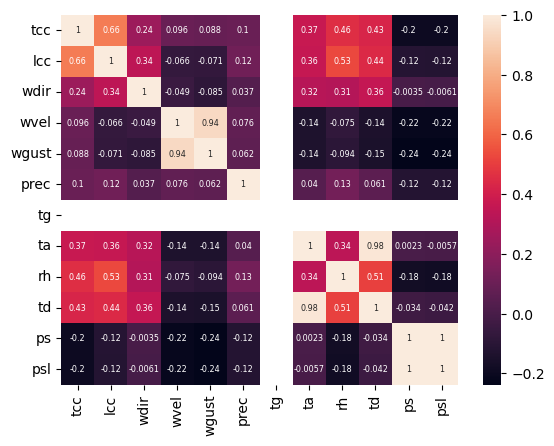

In [25]:




corrs = df.corr()

display (corrs)


s = sns.heatmap (corrs, annot=True, annot_kws={'fontsize': 'xx-small'})
#plt.set(s,  fontsize = 'x-small')

### Диаграммы рассеяния

(-2.5, 52.5)

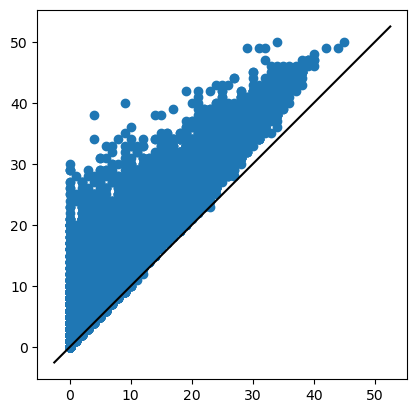

In [26]:
plt.figure()
#plt.scatter (df['ta'], df['td'])
plt.scatter (df['wvel'], df['wgust'])
y_lim = plt.ylim()
display(y_lim)
plt.plot(y_lim, y_lim, '-k')
plt.gca().set_aspect('equal')

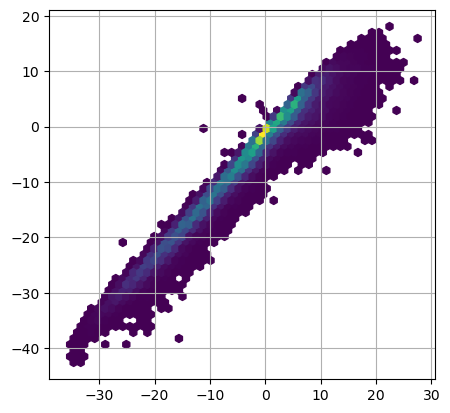

In [27]:
#plt.hexbin(df['wvel'], df['wgust'], gridsize=50, mincnt = 2)

plt.hexbin(df['ta'], df['td'], gridsize=50, mincnt = 1)
plt.gca().set_aspect('equal')
plt.grid()
# plt.xlim((0, 50))
# plt.ylim((0, 50))

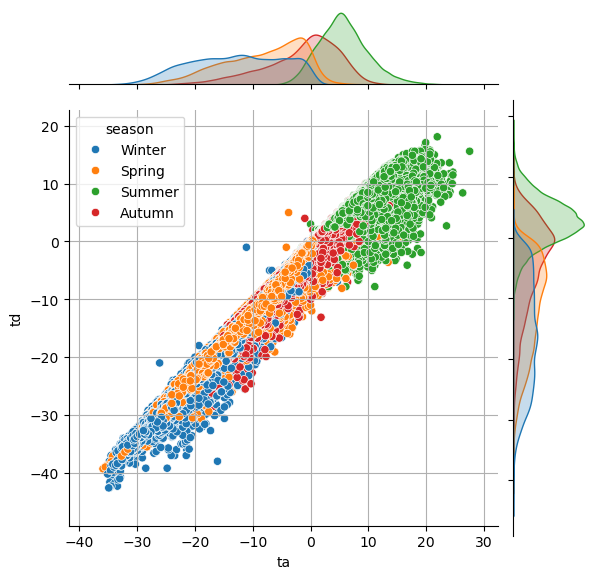

In [28]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


df['season'] = [month_to_season (m) for m in df.index.month] 

sns.jointplot(df, x = 'ta', y = 'td', hue = 'season', palette="tab10") #, kind = 'hex', color = 'blue') palette="tab10") #
plt.gca().set_aspect('equal')
plt.grid()

<Axes: xlabel='tcc', ylabel='rh'>

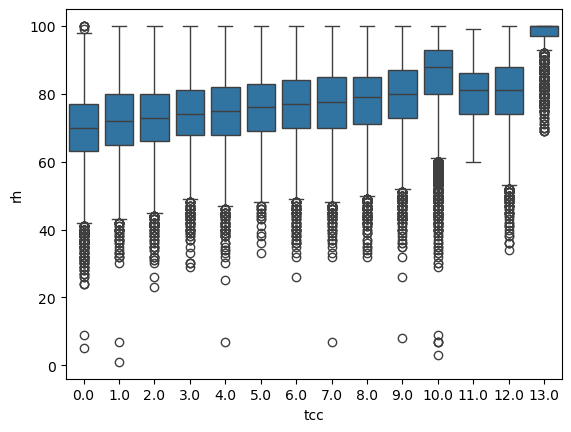

In [29]:
# Ящики с усами для двумерного анализа
sns.boxplot(df, x = 'tcc', y = 'rh')

In [30]:
#sns.pairplot (df)

#### Многомерный анализ данных

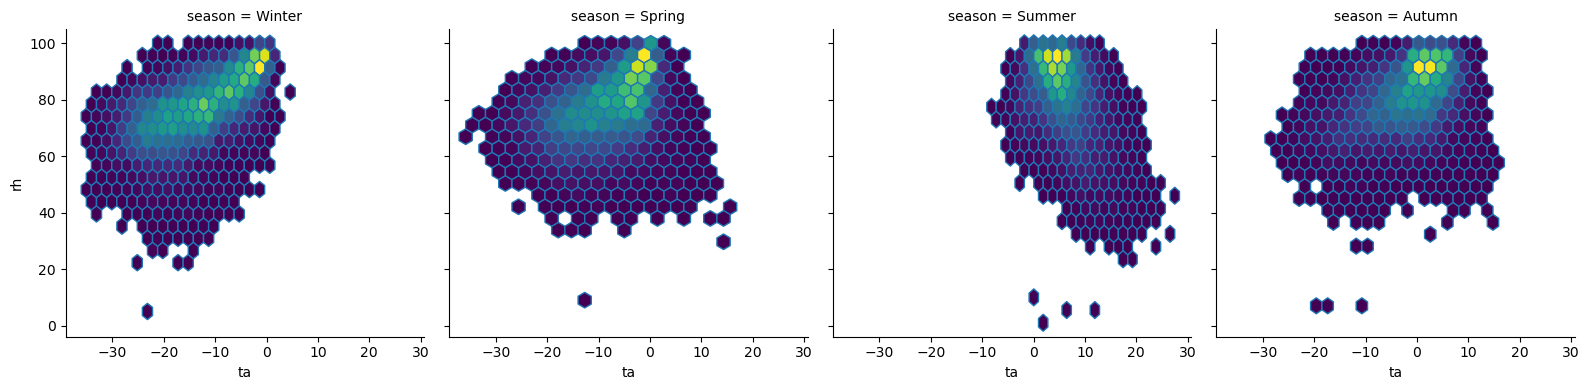

In [31]:
g = sns.FacetGrid(df, col = 'season', height=4, aspect = 1) 

g.map(plt.hexbin, 'ta', 'rh', gridsize=20, mincnt = 1)
